In [1]:
import matplotlib.pyplot as plt
from urllib import request
import ssl

In [2]:
day_indexs=[]
day_lengths=[]

# day length variation in 2016/01
url='https://datacenter.iers.org/eop/-/somos/5Rgv/latestXL/207/bulletinb-337/csv'
# 爬https必须的东西; 因为数据不整齐，所以没有采用pandas
ssl._create_default_https_context = ssl._create_unverified_context
# read all
with request.urlopen(url) as response:
    lines=response.read().decode('utf8')

In [3]:
line_list=lines.split('\n')
for i, line in enumerate(line_list):
    words=line.split(';')
    try:
        day_index=float(words[0])
        day_length=float(words[12])
        
        day_indexs.append(day_index)
        day_lengths.append(day_length)
    except:
        pass
        # print(f'line {i} not readable')

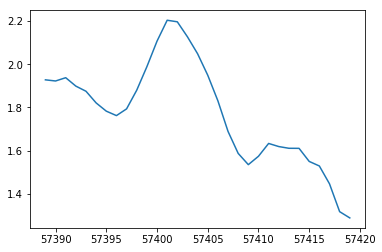

In [4]:
plt.plot(day_indexs, day_lengths)

In [5]:
# read 5 years data; 改变原来url后面的部分即可
year_number=5
all_day_indexs=[]
all_day_lengths=[]

for i in range(338-12*year_number, 338):
    filename=f'https://datacenter.iers.org/eop/-/somos/5Rgv/latestXL/207/bulletinb-{i}/csv'
    with request.urlopen(filename) as response:
        lines=response.read().decode('utf8')
    line_list=lines.split('\n')
    for line in line_list:
        words=line.split(';')
        try:
            day_index=float(words[0])
            day_length=float(words[12])
            all_day_indexs.append(day_index)
            all_day_lengths.append(day_length)
        except:
            pass

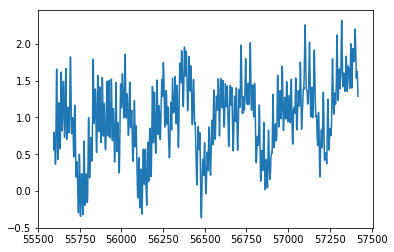

In [6]:
plt.plot(all_day_indexs, all_day_lengths)